C:\Users\pc\AppData\Local\Temp\ipykernel_20180\3070195284.py:12: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/pc/Desktop/10 Academy/week 5/data/raw/data.csv')


Shape: (95662, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95660 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95660 non-null  float64
 7   ProviderId            95660 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95659 non-null  float64
 13  TransactionStartTime  95661 non-null  object 
 14  PricingStrategy       95659 non-null  float64
 15  

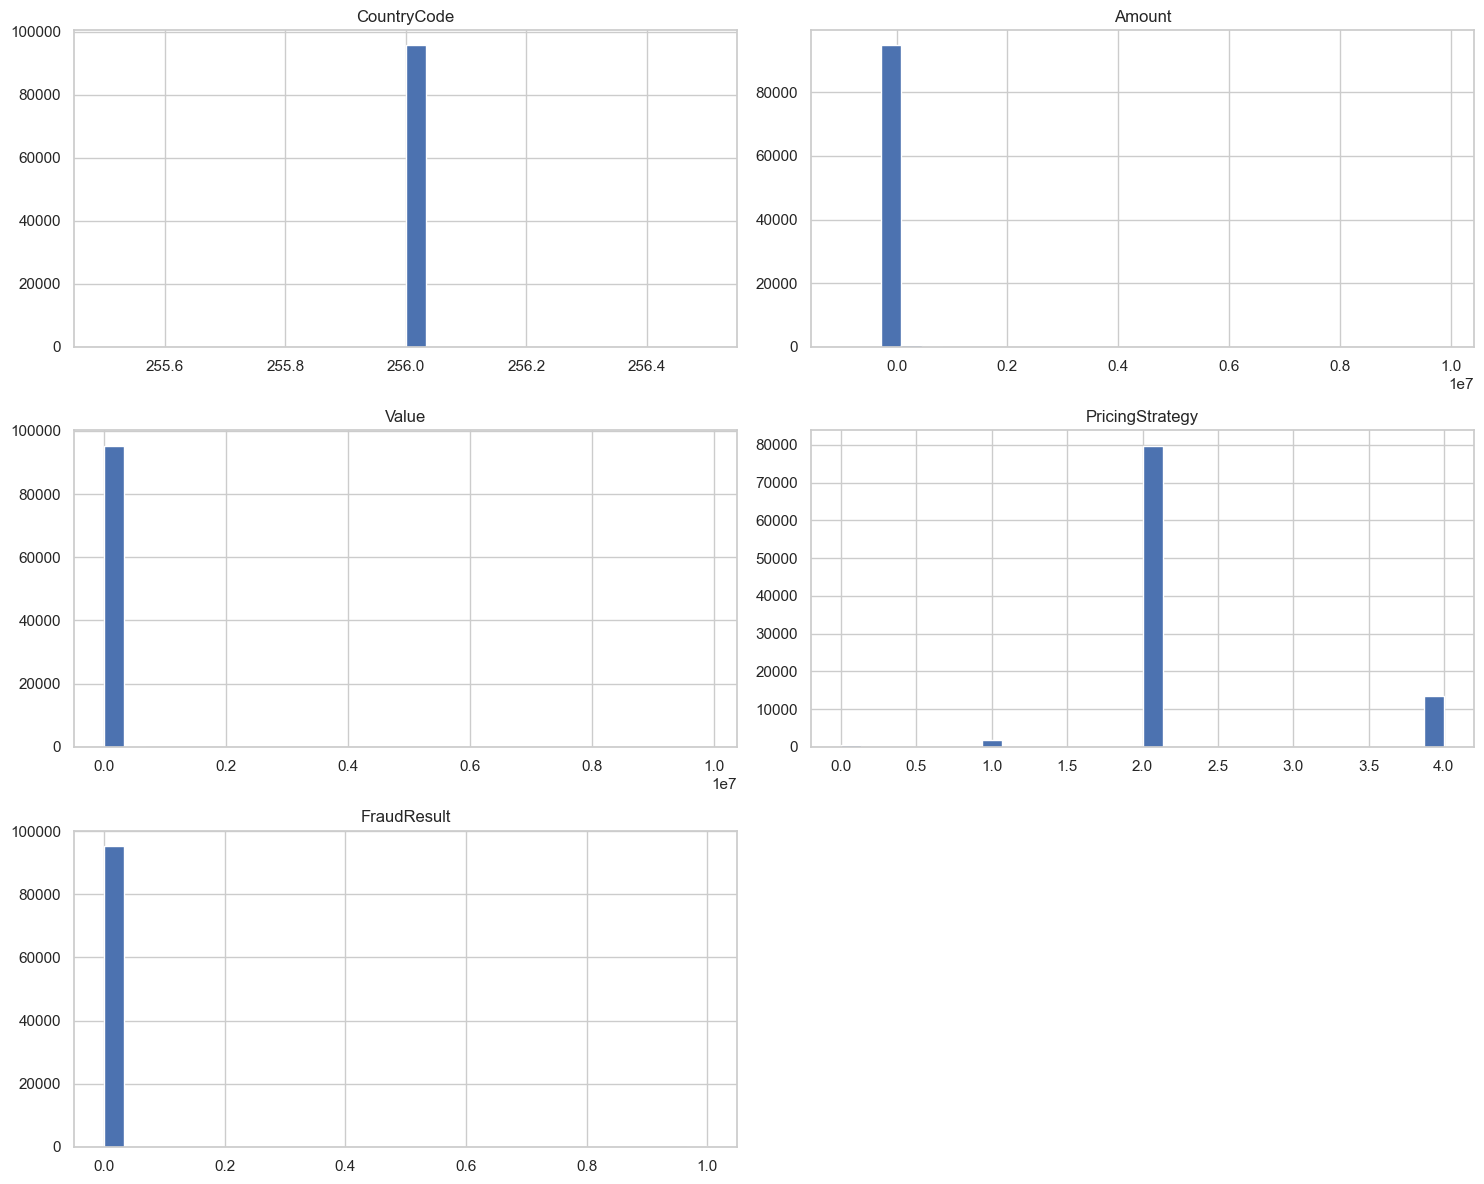

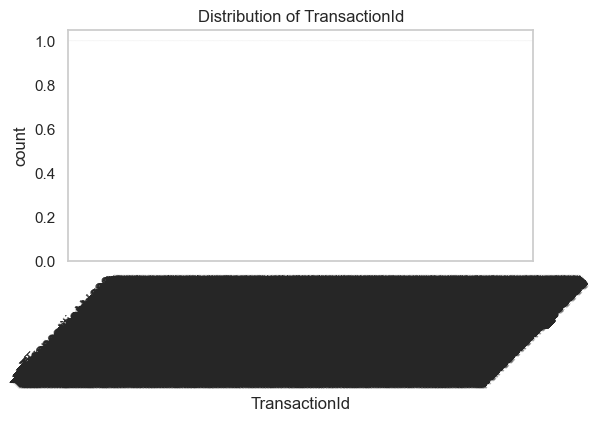

KeyboardInterrupt: 

In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# 2. Load the Dataset
df = pd.read_csv('C:/Users/pc/Desktop/10 Academy/week 5/data/raw/data.csv')

# Dataset shape and structure
print("Shape:", df.shape)
df.info()
df.head()

# Summary stats for numerical features
df.describe()

# Summary for categorical features
df.describe(include='object')

numerical_cols = df.select_dtypes(include=[np.number]).columns

# Histogram for each numerical feature
df[numerical_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

categorical_cols = df.select_dtypes(include='object').columns

# Bar plot for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Missong Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
missing_df

# Boxplot for outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



     
